In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

C:\Users\saira\AppData\Local\Temp\ipykernel_11036\4002727339.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gdp = gdp.resample('M').ffill()


<Axes: title={'center': 'US GDP Growth (YoY %)'}, xlabel='DATE'>

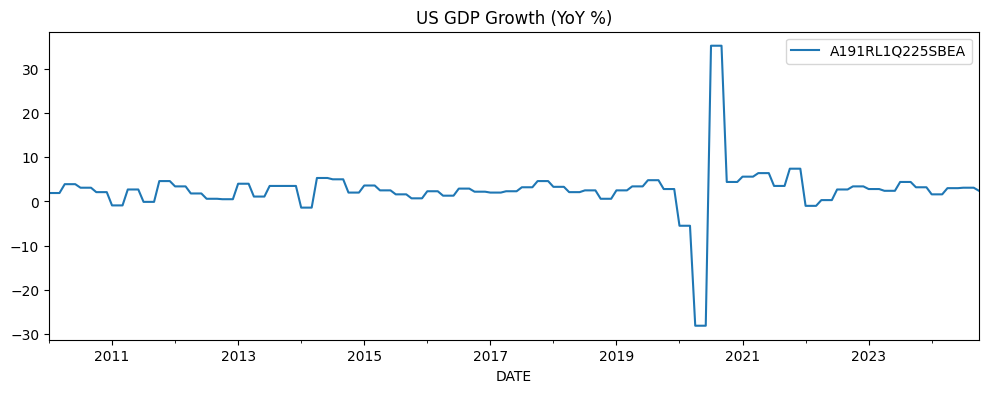

In [2]:
# GDP growth (YoY %)
gdp = pdr.DataReader('A191RL1Q225SBEA', 'fred', '2010-01-01', '2024-12-31')
gdp = gdp.resample('M').ffill()
gdp.to_csv('../data/gdp_growth.csv')

gdp.plot(title="US GDP Growth (YoY %)", figsize=(12, 4))

<Axes: title={'center': 'Consumer Price Index (CPI)'}, xlabel='DATE'>

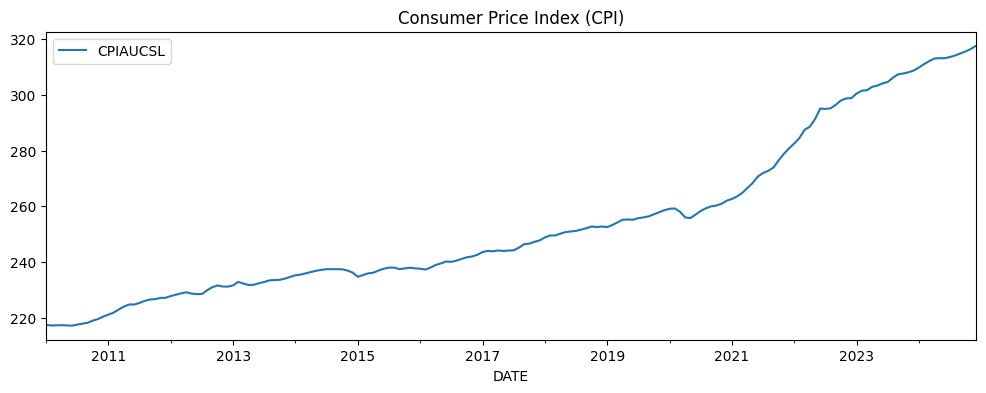

In [3]:
# CPI Monthly inflation (YoY %)
cpi = pdr.DataReader('CPIAUCSL', 'fred', '2010-01-01', '2024-12-31')
cpi.to_csv('../data/cpi.csv')
cpi.plot(title="Consumer Price Index (CPI)", figsize=(12, 4))

<Axes: title={'center': 'Federal Funds Rate (%)'}, xlabel='DATE'>

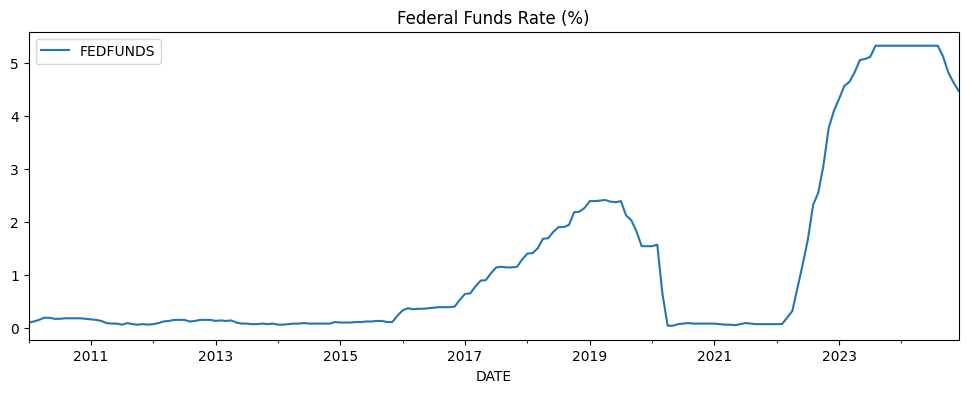

In [4]:
# Interest Rates
interest = pdr.DataReader('FEDFUNDS', 'fred', '2010-01-01', '2024-12-31')
interest.to_csv('../data/fed_funds_rate.csv')
interest.plot(title="Federal Funds Rate (%)", figsize=(12, 4))


<Axes: title={'center': 'Unemployment Rate (%)'}, xlabel='DATE'>

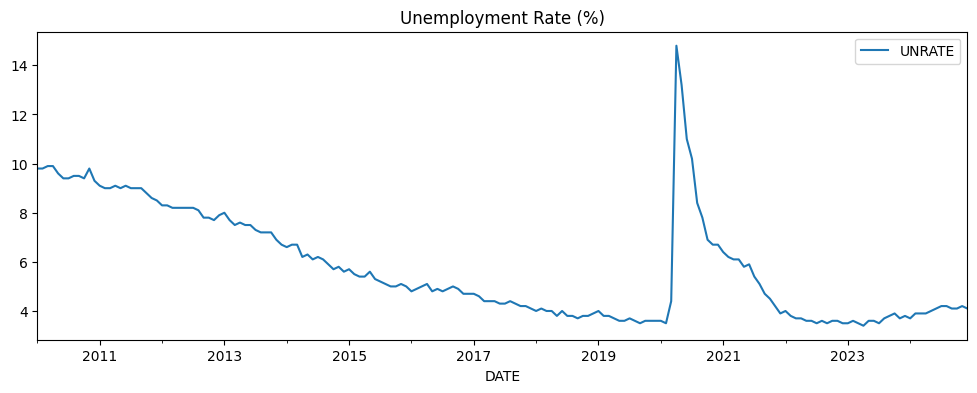

In [5]:
# Unemployment rate (%)
unemp = pdr.DataReader('UNRATE', 'fred', '2010-01-01', '2024-12-31')
unemp.to_csv('../data/unemployment_rate.csv')
unemp.plot(title="Unemployment Rate (%)", figsize=(12, 4))


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

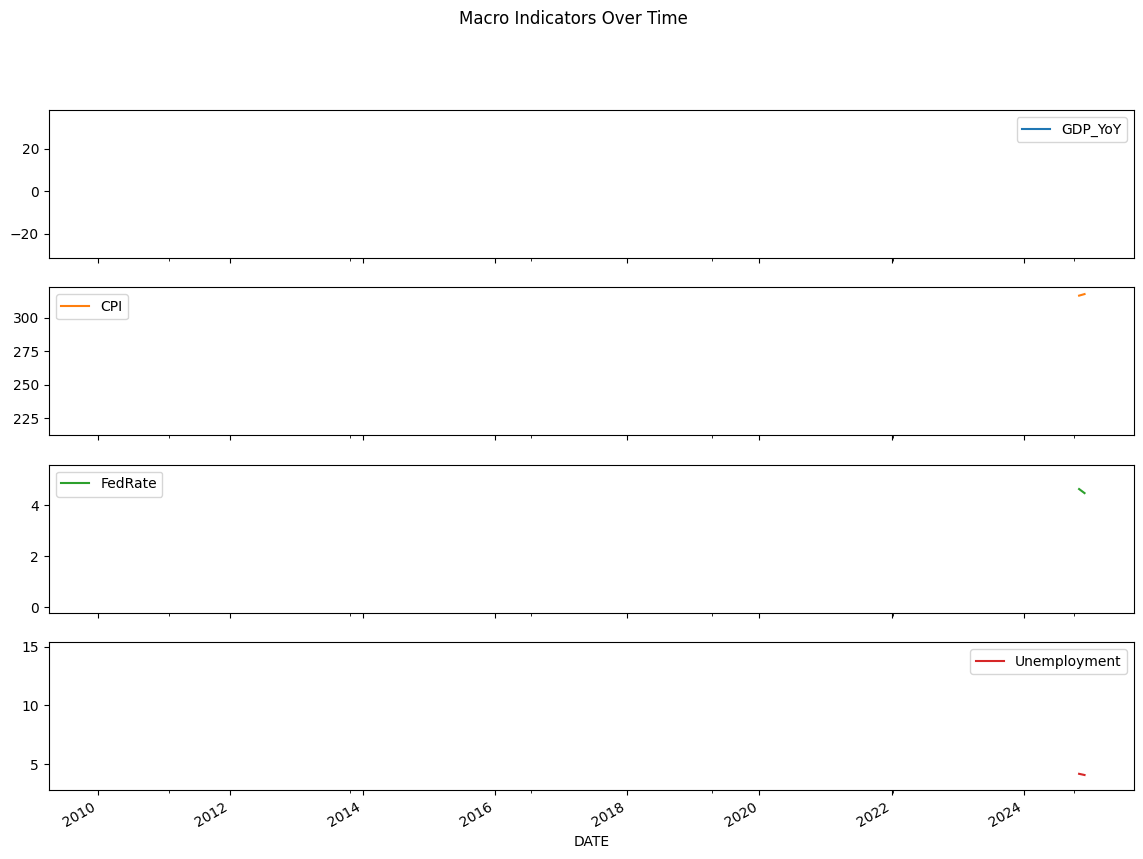

In [8]:
import pandas as pd

gdp = pd.read_csv('../data/gdp_growth.csv', index_col=0, parse_dates=True)
cpi = pd.read_csv('../data/cpi.csv', index_col=0, parse_dates=True)
interest = pd.read_csv('../data/fed_funds_rate.csv', index_col=0, parse_dates=True)
unemp = pd.read_csv('../data/unemployment_rate.csv', index_col=0, parse_dates=True)

# Merge everything
macro = gdp.join([cpi, interest, unemp], how='outer')
macro.columns = ['GDP_YoY', 'CPI', 'FedRate', 'Unemployment']
macro.to_csv('../data/macro_indicators.csv')

macro.plot(subplots=True, figsize=(14, 10), title="Macro Indicators Over Time")